<center><h2>Clustering & k-means</h2></center>

<center><img src="https://uploads.toptal.io/blog/image/92521/toptal-blog-image-1463639098844-eb9ad14c7f665e556b2cb66a65b6c257.jpg" width="55%"/></center>

By The End Of This Session You Should Be Able To:
----

- Define clustering in your words.
- List the steps of k-means clustering algorithm
- Describe how to choose the best k in k-means
- List advantages and disadvantages of k-means

What is clustering?
------

<center><img src="images/clusters.png" width="85%"/></center>

A unsupervised machine learning to find __discrete subgroups__, where items in one group are most similar to each other than items in another group.

Raw data is often too complex for humans to understand, clustering can reduce that complexity.

For example, Topic Modeling is clustering similar documents together.

<center><h2>Clustering needs a method to measure "similarity"</h2></center>

What are methods to measure similarity?
------

<center><h2> Like evaluation metrics, you should collect distance metrics.</h2></center>

k-means Algorithm
-------

The k-means algorithm involves repeatedly assigning points to clusters and then finding new clusters based on those points.

k-means Algorithm Steps
-------
1. Start:
    1. Choose a number of clusters k
    1. Randomly assign each point to a cluster
1. Repeat:
    1. For each of k clusters, compute cluster *centroid* by taking
mean vector of points in the cluster
    1. Assign each data point to cluster for which centroid is closest
1. Stop when clusters stop changing

<center><img src="images/kmeans_step.png" width="60%"/></center>

What's the correct number of clusters?
----

In [2]:
reset -fs

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn


import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [4]:
 clusters = [(-2, -3, .75, 100),
            (-5, -5, .75, 75),
            (4, 3, 1.5, 200),
            (1, -3, .5, 150),
            (-1, 0.15, 0.75, 100)]
k = len(clusters)
n = sum([c[3] for c in clusters])

x1 = np.array([])
x2 = np.array([])

for c in clusters:
    x1 = np.concatenate([x1, (scipy.stats.norm(c[0], c[2]).rvs(c[3]))])
    x2 = np.concatenate([x2, (scipy.stats.norm(c[1], c[2]).rvs(c[3]))])
x = np.stack((x1, x2)).T

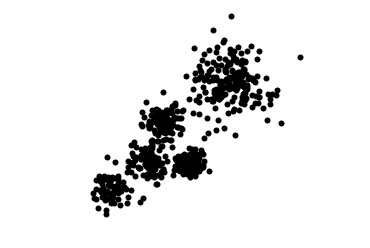

In [5]:
plt.scatter(x[:,0], x[:,1], linewidths=0, color='k')
plt.axis('off');plt.axis('equal');

In [12]:
# Let's fit k-means
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=1) # 1-6
y = km.fit_predict(x)

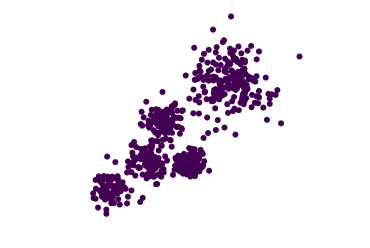

In [13]:
plt.scatter(x[:,0], x[:,1], c=y, linewidths=0)
plt.axis('off');plt.axis('equal');

How do you choose the number of clusters?
-----

Methods to choose number of clusters
-----

- Within-cluster sum of squares (WCSS)
- The Elbow Method 
- Silhouette Score
- [Others in scikit-learn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

Within-Cluster Sum of Squares (WCSS)
-----

Measures the goodness of a clustering

$$W(C) = \frac{1}{K} \sum_{k=1}^{K} \left( \sum_{x_i, x_j \in C_k} || x_i - x_j ||^2 \right)$$

where $K$ is the number of clusters, $C_k$ is the set of all points with label $k$, and $x_i$ is the position of point $i$. 

The problem with wcss 
-------


WCSS will always go does as the number of clusters go up

The Elbow Method
------

Plot the within-cluster sum of squares and try to see what looks like an "elbow".

In [8]:
from sklearn.datasets import load_iris

X = load_iris().data

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

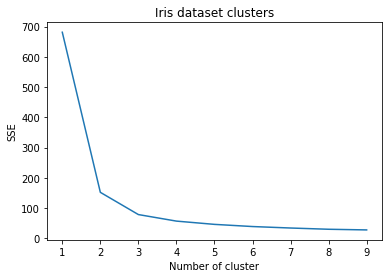

In [9]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster"); plt.ylabel("SSE"); plt.title('Iris dataset clusters');

Source: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

Silhouette Score
-----

A higher Silhouette Score score is proportional to a model with better-defined clusters.

$$\text{silhouette}(x_i) = \frac{b_i - a_i}{max(a_i, b_i)} $$

For each point $x_i$:

* $a_i$ is the mean distance between $x_i$ and all other points in the same cluster
* $b_i$ is the mean distance between $x_i$ and all points in the *nearest* cluster

In [15]:
from sklearn.metrics import silhouette_score

X = load_iris().data

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print(f"For # clusters = {n_cluster}, the Silhouette Coefficient is {score:.4f}") 

For # clusters = 9, the Silhouette Coefficient is 0.6810
For # clusters = 9, the Silhouette Coefficient is 0.5528
For # clusters = 9, the Silhouette Coefficient is 0.4981
For # clusters = 9, the Silhouette Coefficient is 0.4931
For # clusters = 9, the Silhouette Coefficient is 0.3687
For # clusters = 9, the Silhouette Coefficient is 0.3475
For # clusters = 9, the Silhouette Coefficient is 0.3506
For # clusters = 9, the Silhouette Coefficient is 0.3248


What is the best the Silhouette Coefficient?

It is 2. 

We know the ground truth is 3. 

That is Clustering!

Centroid vs Medoids
-----

Typically, k-means returns a __centroid__ (i.e., the arithmetic mean position of all the points)

In many business settings, you should return the single best _actual_ observed datapoint as a cluster center, aka __medoids__

What are the advantages of k-means?
-----



What are the disadvantage of k-means?
-----

Clustering Types 
------

1. Hard - Each point only belongs to one cluster (e.g., k-means)
1. Soft - Each point can belong to more than one cluster (e.g., Gaussian mixture model)

k-means Optimization Function
------

<center><img src="images/optimitization_function.png" width="100%"/></center>



[Source](https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Info-graphs/Day%2043.jpg)

Check for understanding
-----

K-means is an iterative algorithm. It alternates between what two steps?

Check for understanding
-----

Should you standardize your data before fitting k-means?

Check for understanding
-----

What should you do if you have discrete features?

Check for understanding
-----

What should you do if you have a combination of discrete and continuous features?

Summary
------

- Clustering is an unsupervised machine learning technique that tries to group similar datapoints together.
- k-means is the most common type of clustering
- k-means training:
    1. Updates the centroid of existing clusters
    2. Re-assigns datapoints to nearest centriod
- Be aware of limitations (e.g., distance metric and scaling)

Bonus Material
-----

What is the relationship between k-nn and k-means?
-----

Nothing important.

They both use k as a parameter

K-means
----

Mathematically, k-means partitions the observations according to the Voronoi diagram generated by the means.


[A nice implementation of k-means](https://github.com/rhettinger/modernpython/blob/master/kmeans.py)

k-means++
-----

Like many algoritms, k-means is easy to get caught in a local minimum.

How would we choose a better starting points?

One alternative to this is to choose centroids based on random points, which will make it likely initial centroids will be farther apart.

k-means++ is an extension of this idea, the same algorithm as k-means but with a different starting point.

 * Choose one point for first center.
 * Repeat:
    
    * Calculate distance from each point to the nearest center $d_i$
    * Choose a point to be the next center, randomly, using a weighed probability $d_i^2$

 ... until k centers have been choosen.

In [11]:
Other 

NameError: name 'Other' is not defined